### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import re

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### Loading coco file

In [2]:
path = '/content/sample_coco.txt'

lines = []
with open(path) as f:
    lines = f.readlines()

In [3]:
class create_dict(dict):
    def __init__(self):
        self = dict()
        
    def add(self, key, value):
        self[key] = value

In [4]:
def df_reformat(columns,dataList):
    ls = []
    dataDict = create_dict()
    for i in dataList:
        a = i.replace(',\n','')
        val = re.findall('[0-9]+', a)
        for cnt,dat in zip(columns,val):
            dataDict.add(cnt,dat)
        ls.append(dataDict.copy())
    return ls

In [5]:
columns = ['id', 'height', 'width', 'x', 'y', 'bbox_width', 'bbox_height']

In [6]:
def get_classes(i):
    classes = ['person','bicycle','car','motorcycle','airplane','bus','train','truck','boat','traffic light','fire hydrant','stop sign','parking meter','bench','bird','cat','dog','horse','sheep','cow','elephant','bear','zebra','giraffe','backpack','umbrella','handbag','tie','suitcase','frisbee','skis','snowboard','sports ball','kite','baseball bat','baseball glove','skateboard','surfboard','tennis racket','bottle','wine glass','cup','fork','knife','spoon','bowl','banana','apple','sandwich','orange','broccoli','carrot','hot dog','pizza','donut','cake','chair','couch','potted plant','bed','dining table','toilet','tv','laptop','mouse','remote','keyboard','cell phone','microwave','oven','toaster','sink','refrigerator','book','clock','vase','scissors','teddy bear','hair drier','toothbrush']
    return classes[i]

### Converting dataset to dataframe

In [7]:
df = pd.DataFrame(df_reformat(columns,dataList=lines))
df = df.astype(dtype=np.int64)
df['height'] = [x/x for x in df.height]
df['width'] = [x/x for x in df.width]
df['x'] = [x/y for x,y in zip(df.x,df.width)]
df['y'] = [x/y for x,y in zip(df.y,df.height)]
df['bbox_width'] = [x/y for x,y in zip(df.bbox_width,df.width)]
df['bbox_height'] = [x/y for x,y in zip(df.bbox_height,df.height)]
df['class'] = df['id'].map(get_classes)

In [8]:
df.head()

,id,height,width,x,y,bbox_width,bbox_height,class
0,0,1.0,1.0,69.0,464.0,312.0,175.0,person
1,1,1.0,1.0,359.0,292.0,83.0,199.0,bicycle
2,3,1.0,1.0,297.0,312.0,267.0,167.0,motorcycle
3,34,1.0,1.0,275.0,112.0,319.0,290.0,baseball bat
4,20,1.0,1.0,71.0,368.0,146.0,147.0,elephant


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10105 entries, 0 to 10104
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10105 non-null  int64  
 1   height       10105 non-null  float64
 2   width        10105 non-null  float64
 3   x            10105 non-null  float64
 4   y            10105 non-null  float64
 5   bbox_width   10105 non-null  float64
 6   bbox_height  10105 non-null  float64
 7   class        10105 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 631.7+ KB


### Sampling for to get ideal number of clusters

In [10]:
sample = df.sample(1000,axis=0) # get first 1000 samples
X = sample[['bbox_width','bbox_height']].reset_index()
X = X.drop(columns=['index'])

### Finding ideal number of clusters using Elbow method

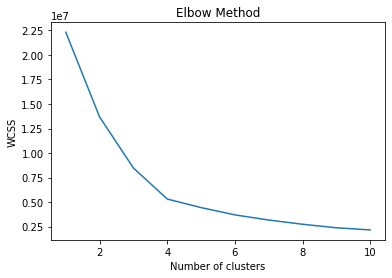

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Kmeans on n_cluster=3

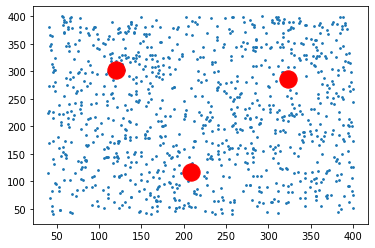

In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X['bbox_width'], X['bbox_height'],s=3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

### Kmeans on n_cluster=4

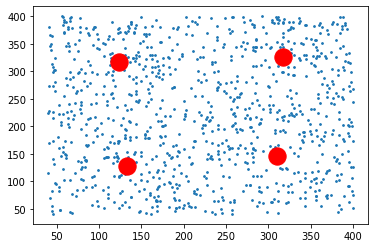

In [13]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X['bbox_width'], X['bbox_height'],s=3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

### Kmeans on n_cluster=5

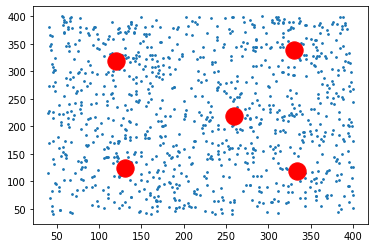

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X['bbox_width'], X['bbox_height'],s=3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

### Kmeans on n_cluster=6

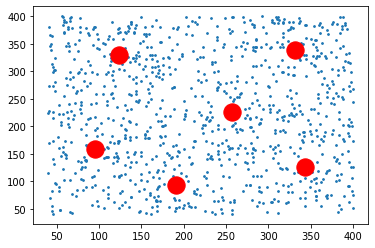

In [15]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X['bbox_width'], X['bbox_height'],s=3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [16]:
df.head()

,id,height,width,x,y,bbox_width,bbox_height,class
0,0,1.0,1.0,69.0,464.0,312.0,175.0,person
1,1,1.0,1.0,359.0,292.0,83.0,199.0,bicycle
2,3,1.0,1.0,297.0,312.0,267.0,167.0,motorcycle
3,34,1.0,1.0,275.0,112.0,319.0,290.0,baseball bat
4,20,1.0,1.0,71.0,368.0,146.0,147.0,elephant


In [17]:
class_spread = dict(df['class'].value_counts())
class_spread = dict(sorted(class_spread.items(), key=lambda item: item[0]))
df = class_spread
names = list(df.keys())
values = list(df.values())

### Class Distribution

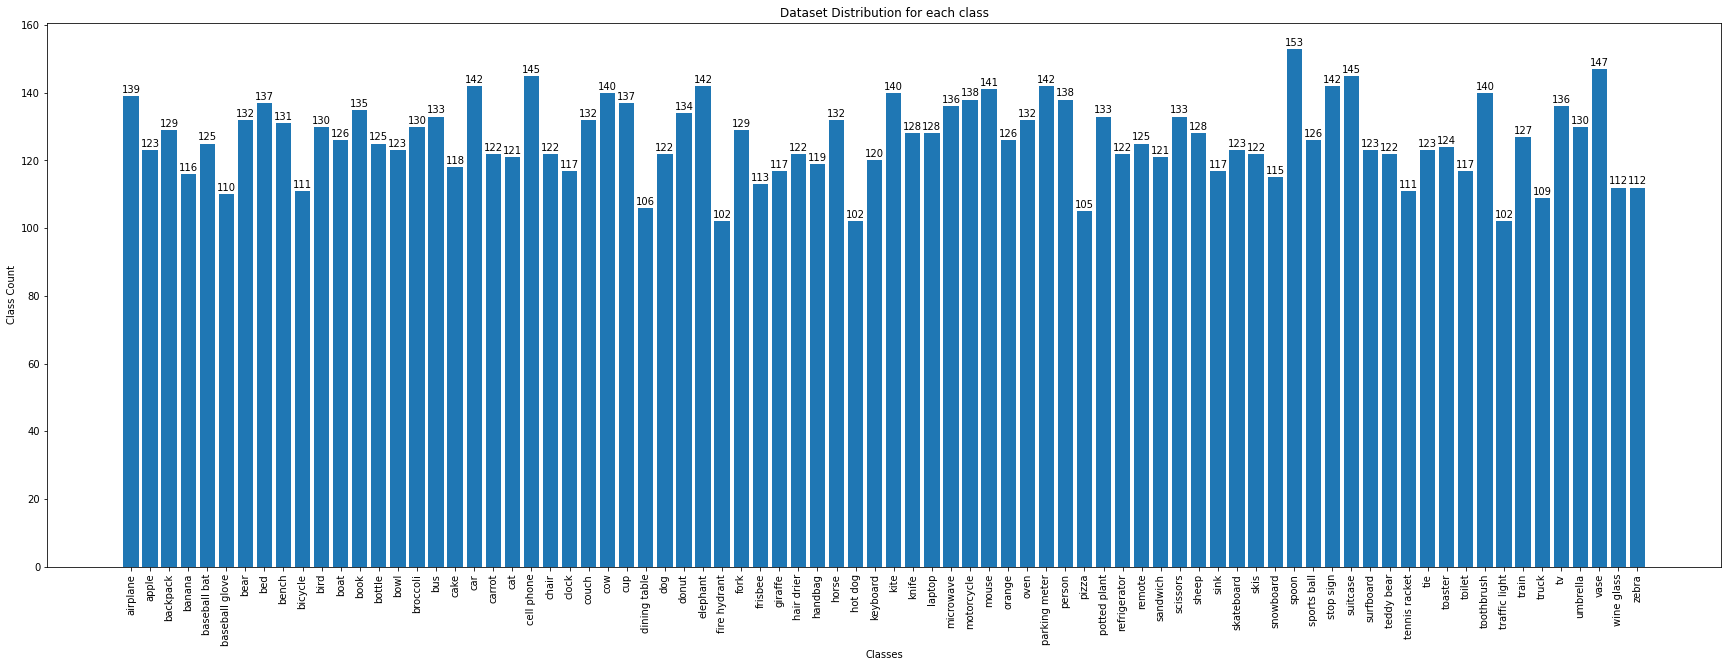

In [18]:
plt.figure(figsize=(30,10)) 
plt.bar(range(len(df)), values, tick_label=names)
for i in range(len(values)):
    plt.annotate(values[i], (-0.5 + i, values[i] + 1))
plt.xticks(rotation='90')
plt.xlabel("Classes")
plt.ylabel("Class Count")
plt.title("Dataset Distribution for each class")
plt.show()

In [19]:
X_clusters= sample[['bbox_width','bbox_height']].reset_index().drop(columns=['index'])

In [20]:
centroid_ls = []
sse= []
clusters=[]
for anchor in np.arange(3,7):
    clusters.append(anchor)
    kmeans = KMeans(n_clusters=anchor, init='k-means++', max_iter=300, n_init=10, random_state=40)
    pred_y = kmeans.fit_predict(X_clusters)
    centroid = kmeans.cluster_centers_
    sse.append(kmeans.inertia_)    
    cnt =0
    centroid_dict = {}
    centroid_df = pd.DataFrame()
    for i in centroid:
        cnt +=1
        name = '{}'.format(cnt)
        centroid_df[name] = list(1/(abs(X['bbox_width'] - i[0])*abs(X['bbox_height'] - i[1])))
        centroid_dict[name] = i
    
    centroid_ls.append(centroid_dict)

In [21]:
centroid_arr = []
for i in range(len(centroid_ls)):
    ls= []
    for key,values in centroid_ls[i].items():
        ls.append(np.array(values))
    centroid_arr.append(np.array(ls))

In [22]:
def get_iou(x, centroids):
    dists = []
    for centroid in centroids:
        c_w, c_h = centroid
        w, h = x
        if c_w >= w and c_h >= h:
            dist = w * h / (c_w * c_h)
        elif c_w >= w and c_h <= h:
            dist = w * c_h / (w * h + (c_w - w) * c_h)
        elif c_w <= w and c_h >= h:
            dist = c_w * h / (w * h + c_w * (c_h - h))
        else:  # means both w,h are bigger than c_w and c_h respectively
            dist = (c_w * c_h) / (w * h)
        dists.append(dist)
    return np.array(dists)

def average_iou(ious):
    n = ious.shape[0]
    sums = 0.
    for i in range(n):
        # note IOU() will return array which contains IoU for each centroid and X[i]
        # slightly ineffective, but I am too lazy
        sums += max(ious[i])
    return sums / n

In [23]:
ious = []
for c in range(len(clusters)):
    sample['iou'+str(c)] = ious.append(average_iou(np.array(sample[['bbox_width','bbox_height']].apply(lambda x: get_iou((x['bbox_width'], 
                                                              x['bbox_height']), centroid_arr[c]), axis=1))))

In [26]:
ious

[0.6070180610944894, 0.6421405582192581, 0.6689903292580942, 0.69158128209001]

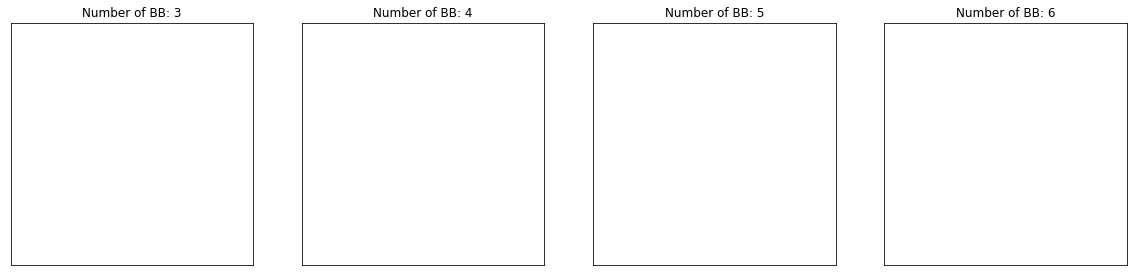

In [24]:
import cv2
import random
cox, coy = 300, 300
fig = plt.figure(figsize=(20, 5))
for k, exp in enumerate(centroid_arr):
    image = cv2.resize(cv2.imread('/content/white.png'), (600, 600), interpolation=cv2.INTER_AREA)
    for box in exp:
        # scale centroid by 1000 times
        cen = box*800/2
        # box start and end
        start_point = (int(cox-cen[0]), int(coy-cen[1]))
        end_point = (int(cox+cen[0]), int(coy+cen[1]))
        # Colour of BB
        color = (random.randint(0, 255+1), random.randint(0, 255+1), random.randint(0, 255+1))
        # Line thickness of 2 px
        thickness = 2

        # Using cv2.rectangle() method
        image = cv2.rectangle(image, start_point, end_point, color, thickness)
    
    ax = fig.add_subplot(1, len(centroid_arr), k + 1, xticks=[], yticks=[])
    ax.set_title("Number of BB: "+ str(len(exp)))
    plt.imshow(image)
plt.show()